# Aprendizaje Automático: Trabajo práctico 1

**Maestría de Exploración de Datos y Descubrimiento del Conocimiento, UBA.**

Profesores: Laura de la Fuente, Hernán Bocaccio

Ayudantes: Gastón Bujía, Diego Onna y Sofía Morena del Pozo

Fecha: Julio 2023


Alumnos: Mastelli - Mujica - Pengue- Tiraboschi

# Implementación del TP

In [1]:
### Importamos librerías

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import random

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21054 sha256=ad4ee42ecc1e41b24a6f1b5a28867fe1c33845f9313f4bcc89619cfd14628d62
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [3]:
import mplcursors
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [4]:
### Establecemos el directorio de drive donde trabajamos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Datos

In [5]:
### IMPORTAMOS EL DATASET PREPROCESADO

pd.set_option("display.max_columns", None)
#RUTA PARA MATEO
# datos= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Aprendizaje Automàtico/TP AA/df_ventas_preprocesado_280522.csv",encoding='latin-1')
#RUTA PARA SERGIO
datos= pd.read_csv("/content/drive/MyDrive/Maestria_DM/AA/TP_1/df_ventas_preprocesado_280522.csv",encoding='latin-1')

#RUTA PARA CARO
# datos= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP AA/df_ventas_preprocesado_280522.csv",encoding='UTF-8')
datos.head()



,Unnamed: 0,rooms,bathrooms,surface_total,price,property_type,terraza_patio_balcon,l3,comunas,price_respuesta
0,2,2.0,3.0,265.0,600000.0,Oficina,True,Recoleta,comuna_2,alto
1,3,5.0,3.0,150.0,195000.0,Oficina,False,Monserrat,comuna_1,medio
2,8,2.0,1.0,80.0,155000.0,Oficina,False,San NicolÃ¡s,comuna_1,medio
3,9,2.0,2.0,160.0,310000.0,Oficina,False,San NicolÃ¡s,comuna_1,alto
4,11,1.0,1.0,38.0,110000.0,Departamento,False,Almagro,comuna_5,bajo


In [6]:
#Antes de seguir avanzando con la exploración de los datos se establece la columna "unnamed: 0" como Indice
datos.set_index("Unnamed: 0", inplace = True)

##EDA

In [7]:
## MIRAMOS QUÉ TAN BALANCEADOS ESTÁN LOS DATOS
# N de datos, balanceo
datos_categorial = datos.copy()
datos_regresion = datos.copy()

print('Prop. x categoria:')
print(datos_categorial['price_respuesta'].value_counts(normalize=True))

print('Media de precio:')
datos_regresion['price'].mean()



Prop. x categoria:
bajo     0.362389
medio    0.348440
alto     0.289171
Name: price_respuesta, dtype: float64
Media de precio:


205995.913281799

Dado que el porcentaje relativo de datos en cada una de las categorias de la variable target "Price_respuesta" es:


* bajo    36 %
* medio    35 %
* alto     29 %

Podemos decir que el df esta balanceado


In [8]:
# Convert "price_respuesta" column to categorical data type
# Esto lo necesito para uno de los graficos mas adelante
datos["price_respuesta"] = pd.Categorical(datos["price_respuesta"], categories=["bajo", "medio", "alto"])

In [9]:
#Forma del df
print(datos.shape)
#Cantidad de datos nulos que contenga el df
datos.isna().sum()

(142300, 9)


rooms                   0
bathrooms               0
surface_total           0
price                   0
property_type           0
terraza_patio_balcon    0
l3                      0
comunas                 0
price_respuesta         0
dtype: int64

Se puede observar que el DF cuenta con 8 atributos (Sacando las 2 variables target) y 142.300 filas las cuales no tienen ningún valor faltante.

In [10]:
#Mas infomración sobre los features: Tipo de datos e infomración estadicticas de los mismos
print(datos.dtypes)
datos.describe()

rooms                    float64
bathrooms                float64
surface_total            float64
price                    float64
property_type             object
terraza_patio_balcon        bool
l3                        object
comunas                   object
price_respuesta         category
dtype: object


,rooms,bathrooms,surface_total,price
count,142300.000000,142300.000000,142300.000000,1.423000e+05
mean,2.559375,1.498082,95.512666,2.059959e+05
std,1.113523,0.756016,128.356300,2.588735e+05
min,1.000000,1.000000,11.000000,1.550000e+04
25%,2.000000,1.000000,50.000000,1.000000e+05
50%,2.000000,1.000000,66.244000,1.499000e+05
75%,3.000000,2.000000,117.765400,2.350000e+05
max,5.000000,5.000000,8900.000000,1.760000e+07


In [11]:
#busco informacion sobre las variables categoricas
print("property_type:")
print(datos["property_type"].value_counts())
print("-------------------")

property_type:
Departamento       114782
PH                  12495
Casa                 5917
Local comercial      4575
Oficina              4528
Casa de campo           3
Name: property_type, dtype: int64
-------------------


In [12]:
#busco informacion sobre las variables categoricas
print("property_type:")
print(datos["property_type"].value_counts())
print("-------------------")
print("terraza_patio_balcon:")
print(datos["terraza_patio_balcon"].value_counts())
print("-------------------")
print("l3:")
print(datos["l3"].value_counts())
print("-------------------")
print("comunas:")
print(datos["comunas"].value_counts())

property_type:
Departamento       114782
PH                  12495
Casa                 5917
Local comercial      4575
Oficina              4528
Casa de campo           3
Name: property_type, dtype: int64
-------------------
terraza_patio_balcon:
True     72729
False    69571
Name: terraza_patio_balcon, dtype: int64
-------------------
l3:
Palermo                 18453
Belgrano                16242
Caballito                9739
Recoleta                 7720
Almagro                  7152
Villa Urquiza            7099
Villa Crespo             6582
Flores                   4286
NuÃ±ez                   4203
Barrio Norte             4163
Balvanera                3908
Colegiales               3297
Villa Devoto             2722
San NicolÃ¡s             2716
Saavedra                 2627
San Cristobal            2525
San Telmo                2305
Villa del Parque         2263
Floresta                 1981
Boedo                    1893
Retiro                   1841
Monserrat                181

Continuamos el Analisis exploratorio de datos univariado graficando boxplot de todas las variables

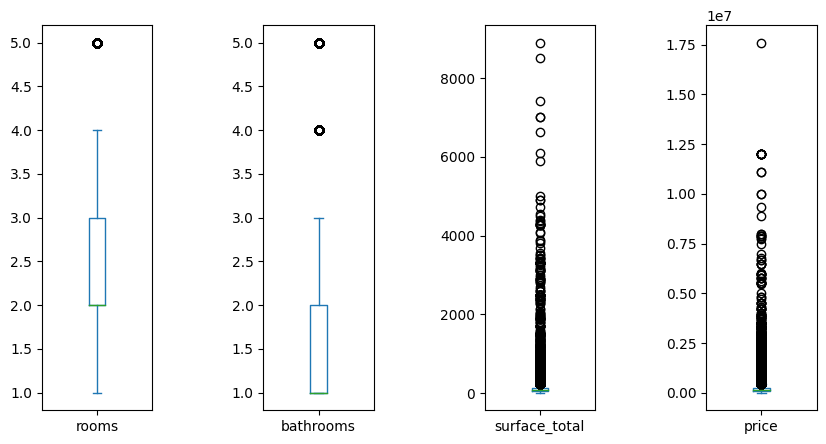

In [13]:
#Boxplot de todos las variables numericas para detectar outliers
datos.plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize= (10, 5)
)
# Aumento especio entre subplots
plt.subplots_adjust(wspace= 1)
plt.show()

En los boxplots de las variables "surface_tota" y "price" se ven tantos "outliers" que me hacen pensar que la distribución de dichas variables tienen colas pezadas naturalmente.

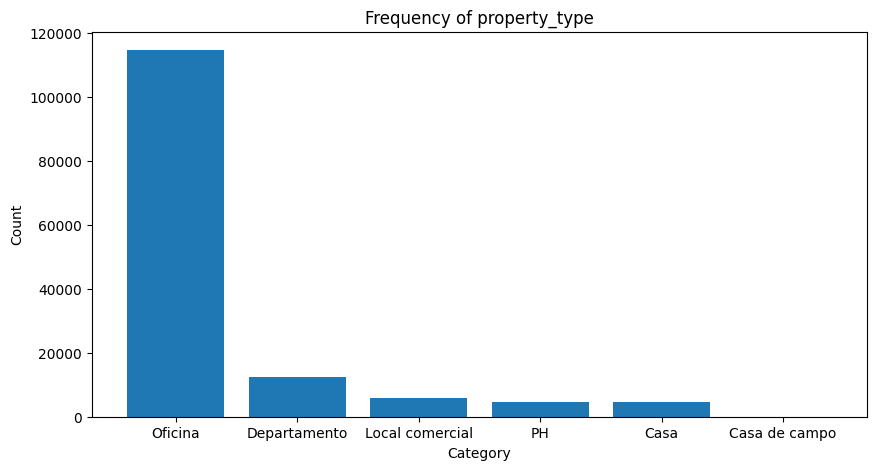

In [14]:
#Analizamos la variable "property_type"
plt.figure(figsize=(10, 5))
x = datos["property_type"].unique()
y = datos["property_type"].value_counts().tolist()
plt.bar(x, y)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of property_type')
plt.show()

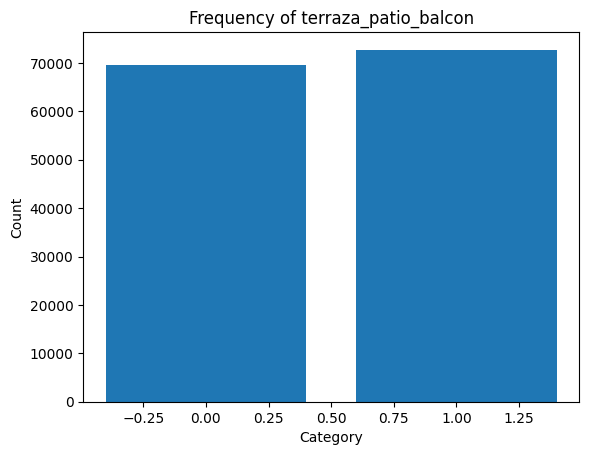

In [15]:
#Analizamos la variable "terraza_patio_balcon"
x = datos["terraza_patio_balcon"].unique()
y = datos["terraza_patio_balcon"].value_counts().tolist()
plt.bar(x, y)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of terraza_patio_balcon')
plt.show()

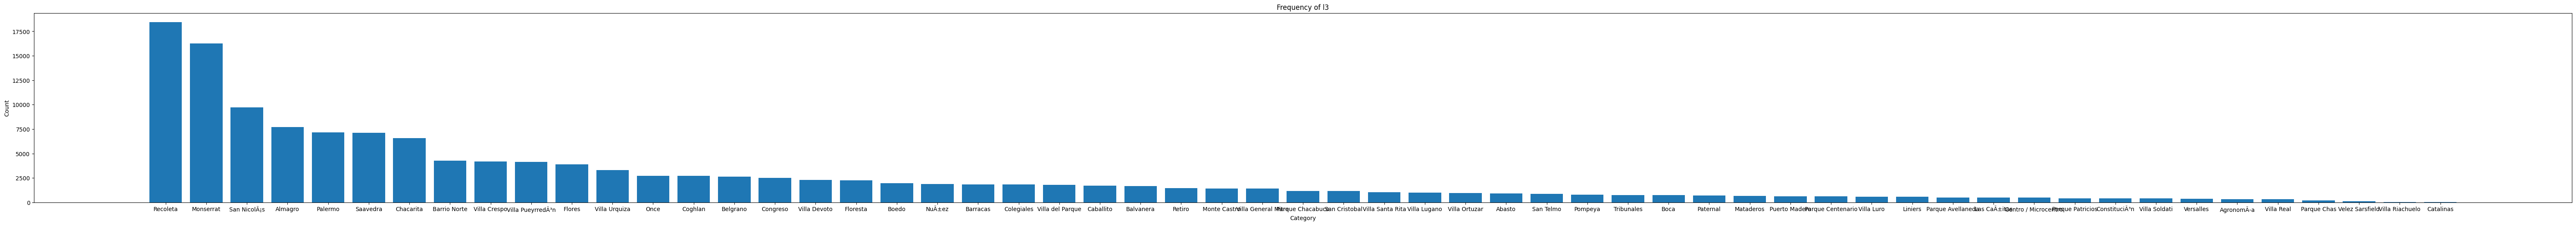

In [16]:
#Analizamos la variable "l3"
# Crear una figura con un eje deslizante
fig, ax = plt.subplots()
fig.set_size_inches(80, 6)
x = datos["l3"].unique()
y = datos["l3"].value_counts().tolist()
ax.bar(x, y)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Frequency of l3')

# Agregar información adicional al gráfico al mover el cursor sobre él
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]}"))

# Mostrar el gráfico
plt.show()

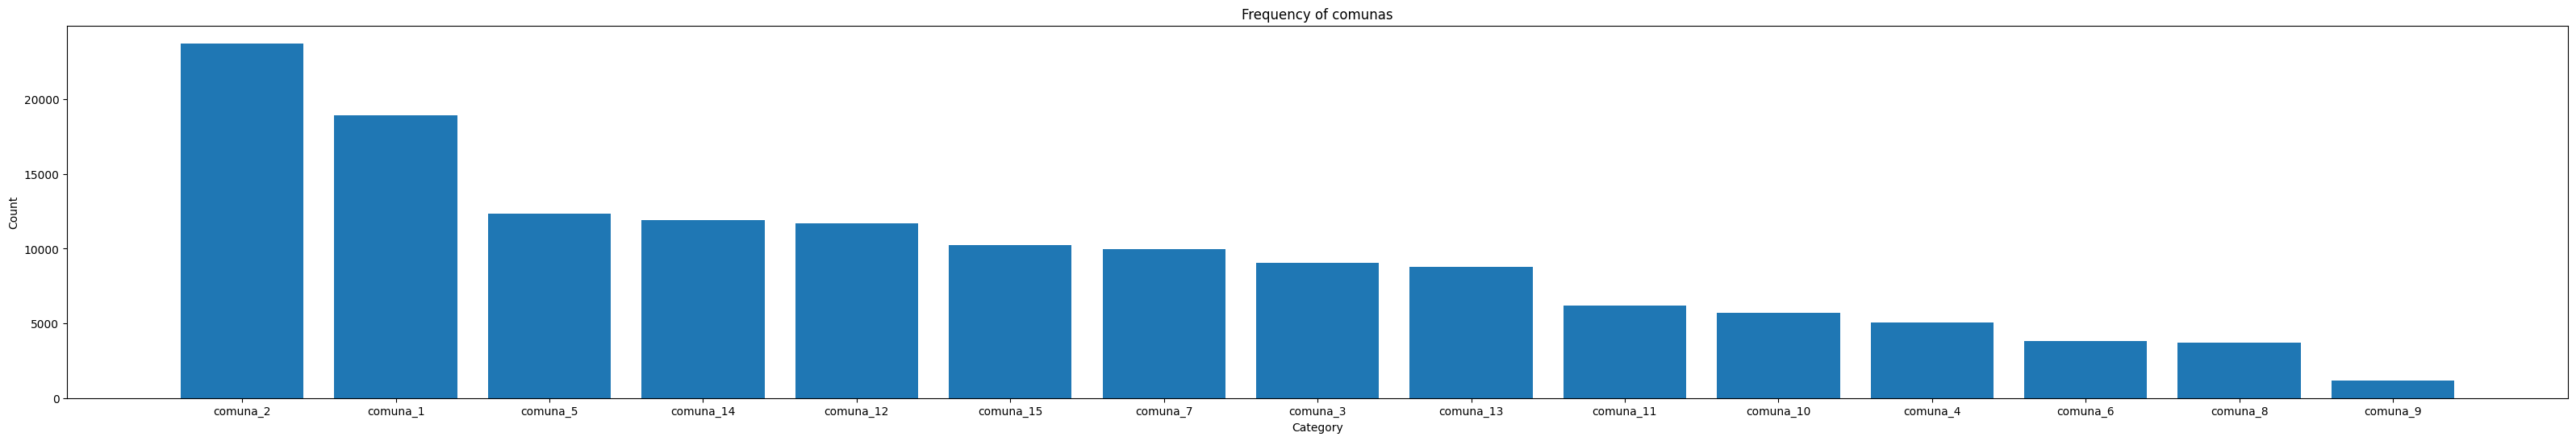

In [17]:
#Analizamos la variable "comunas"
# Crear una figura con un eje deslizante
fig, ax = plt.subplots()
fig.set_size_inches(40, 6)
x = datos["comunas"].unique()
y = datos["comunas"].value_counts().tolist()
ax.bar(x, y)
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Frequency of comunas')

# Agregar información adicional al gráfico al mover el cursor sobre él
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]}"))

# Mostrar el gráfico
plt.show()

Se analizan los mismos graficos pero en función de la variable target "price_price_respuesta"

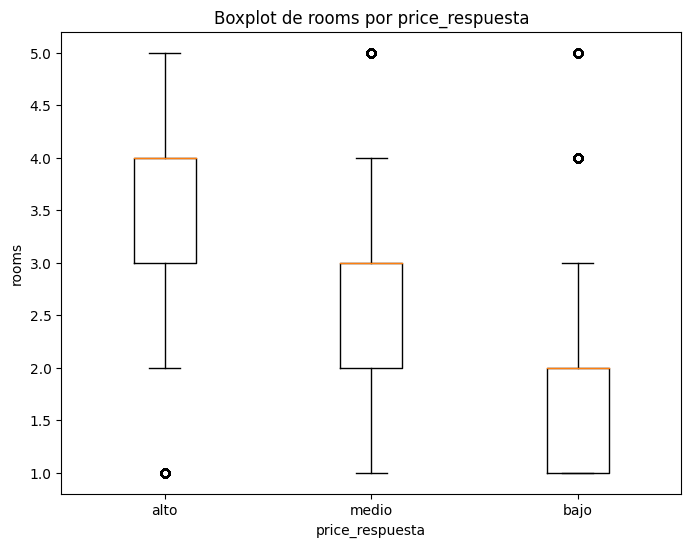

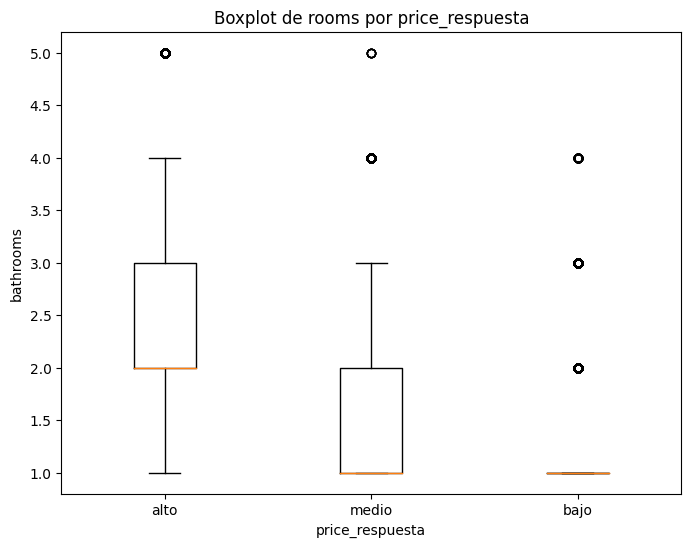

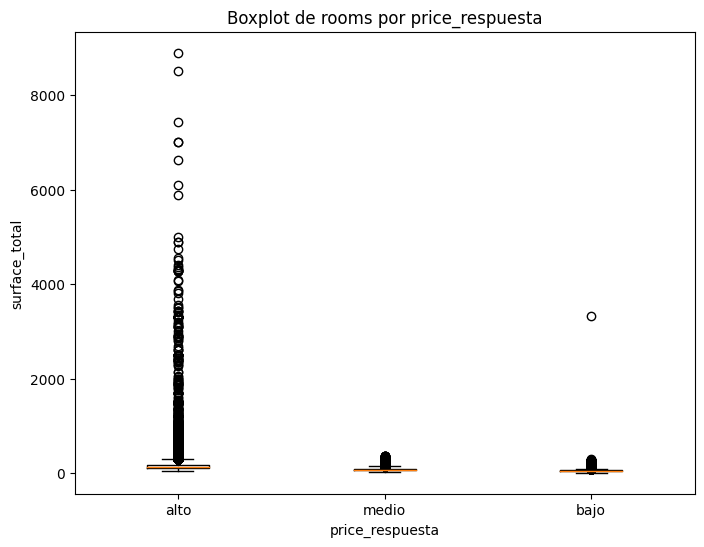

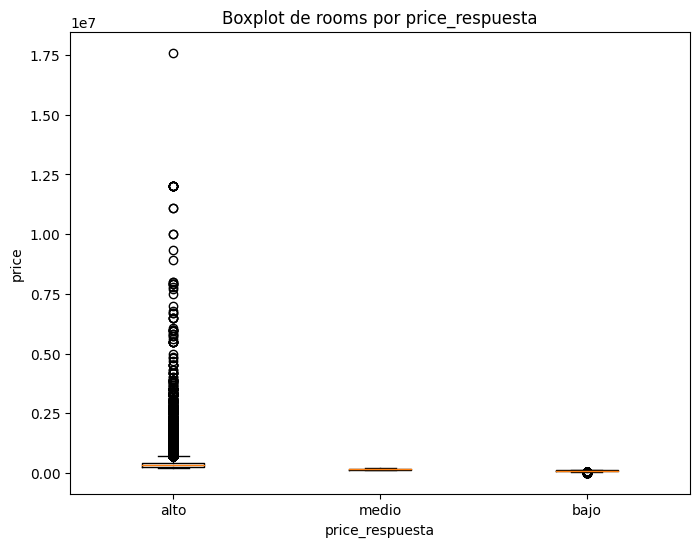

In [18]:
n_columns = datos.select_dtypes(include=['float64']).columns.tolist()

for column in n_columns:
  datos_grupos = [datos.loc[datos['price_respuesta'] == t, column] for t in datos['price_respuesta'].unique()]

  # Trazar los boxplots de cada grupo en un solo gráfico
  plt.figure(figsize=(8, 6))
  plt.boxplot(datos_grupos, labels=datos['price_respuesta'].unique())
  plt.xlabel('price_respuesta')
  plt.ylabel(column)
  plt.title('Boxplot de rooms por price_respuesta')
  plt.show()

Se puede observar que las categoricas de precio y la cantidad de cuartos y baños se relacionan como era de esperar, a medida que aumenta la cantidad de cuartos y baños aumenta el precio.

Por otro lado, en el boxplot de superficie total se observa un claro outlier dentro del grupo de precio respuesta bajo con un valor de superficie muy superior a la media del grupo. VER DE ELIMINAR DICHO OUTLIER
Tambien se desprende de dicho grafico que una propiedad con una superfici total por encima de los 365 m2 (aprox) es muy probable que perteneza al grupo de precio respuesta Alto.




In [19]:
datos["surface_total"]
print("Maxima superficie con precio respuesta bajo")
print(datos.loc[datos["price_respuesta"] == "bajo", "surface_total"].max())
print("Maxima superficie con precio respuesta medio")
print(datos.loc[datos["price_respuesta"] == "medio", "surface_total"].max())
print("Maxima superficie con precio respuesta alto")
print(datos.loc[datos["price_respuesta"] == "alto", "surface_total"].max())

Maxima superficie con precio respuesta bajo
3333.0
Maxima superficie con precio respuesta medio
365.0
Maxima superficie con precio respuesta alto
8900.0


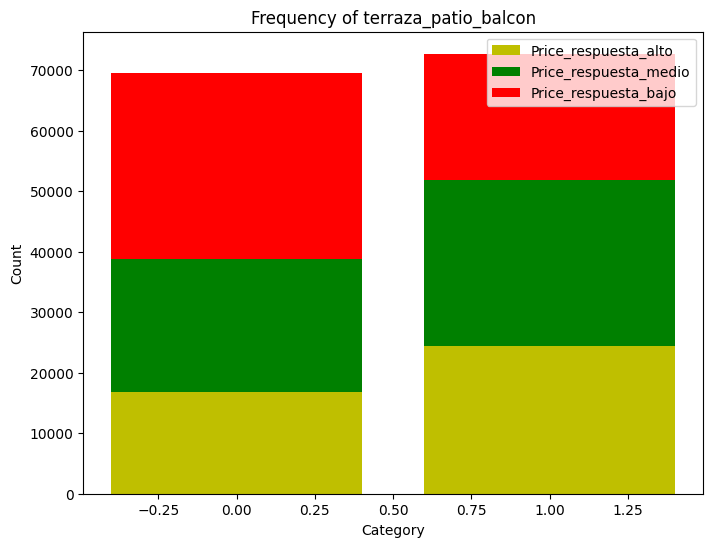

In [20]:
# Agrupar los datos por la columna "terraza_patio_balcon" y la columna "price_respuesta"
grouped_data = datos.groupby(["terraza_patio_balcon", "price_respuesta"])

# Contar el número de ocurrencias para cada combinación de categoría y valor de target
count_data = grouped_data.size().reset_index(name="count")

# Trazar la gráfica con barras adicionales para cada categoría basadas en la variable target
plt.figure(figsize=(8, 6))
plt.bar(count_data[count_data["price_respuesta"]=="alto"]["terraza_patio_balcon"], count_data[count_data["price_respuesta"]=="alto"]["count"], color="y", label="Price_respuesta_alto")
plt.bar(count_data[count_data["price_respuesta"]=="medio"]["terraza_patio_balcon"], count_data[count_data["price_respuesta"]=="medio"]["count"], bottom=count_data[count_data["price_respuesta"]=="alto"]["count"], color="g", label="Price_respuesta_medio")
plt.bar(count_data[count_data["price_respuesta"]=="bajo"]["terraza_patio_balcon"], count_data[count_data["price_respuesta"]=="bajo"]["count"], bottom=count_data[count_data["price_respuesta"].isin(["medio","alto"])].groupby("terraza_patio_balcon").sum()["count"], color="r", label="Price_respuesta_bajo")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of terraza_patio_balcon')
plt.legend()
plt.show()

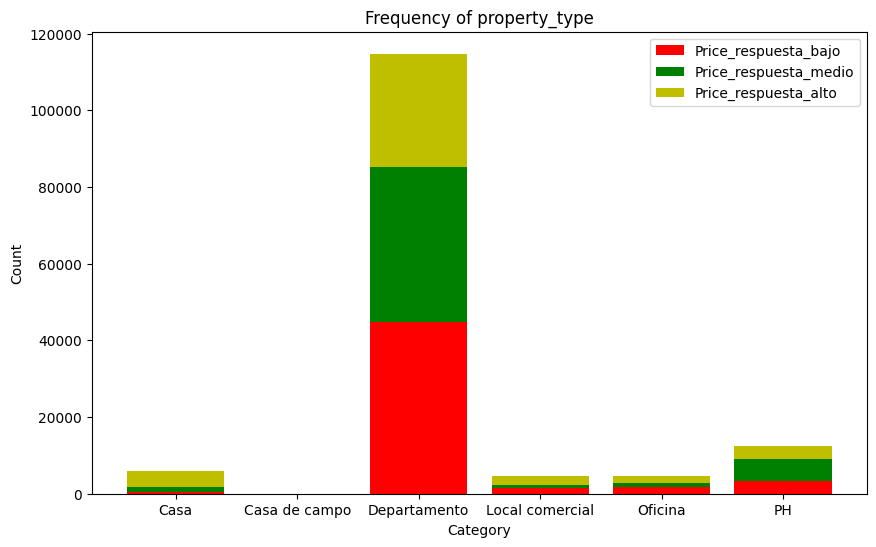

In [21]:
# Agrupar los datos por la columna "property_type" y la columna "price_respuesta"
grouped_data = datos.groupby(["property_type", "price_respuesta"])

# Contar el número de ocurrencias para cada combinación de categoría y valor de target
count_data = grouped_data.size().reset_index(name="count")

# Trazar la gráfica con barras adicionales para cada categoría basadas en la variable target
plt.figure(figsize=(10, 6))
plt.bar(count_data[count_data["price_respuesta"]=="bajo"]["property_type"], count_data[count_data["price_respuesta"]=="bajo"]["count"], color="r", label="Price_respuesta_bajo")
plt.bar(count_data[count_data["price_respuesta"]=="medio"]["property_type"], count_data[count_data["price_respuesta"]=="medio"]["count"], bottom=count_data[count_data["price_respuesta"]=="bajo"]["count"], color="g", label="Price_respuesta_medio")
plt.bar(count_data[count_data["price_respuesta"]=="alto"]["property_type"], count_data[count_data["price_respuesta"]=="alto"]["count"],  bottom=count_data[count_data["price_respuesta"].isin(["bajo","medio"])].groupby("property_type").sum()["count"], color="y", label="Price_respuesta_alto")
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of property_type')
plt.legend()
plt.show()

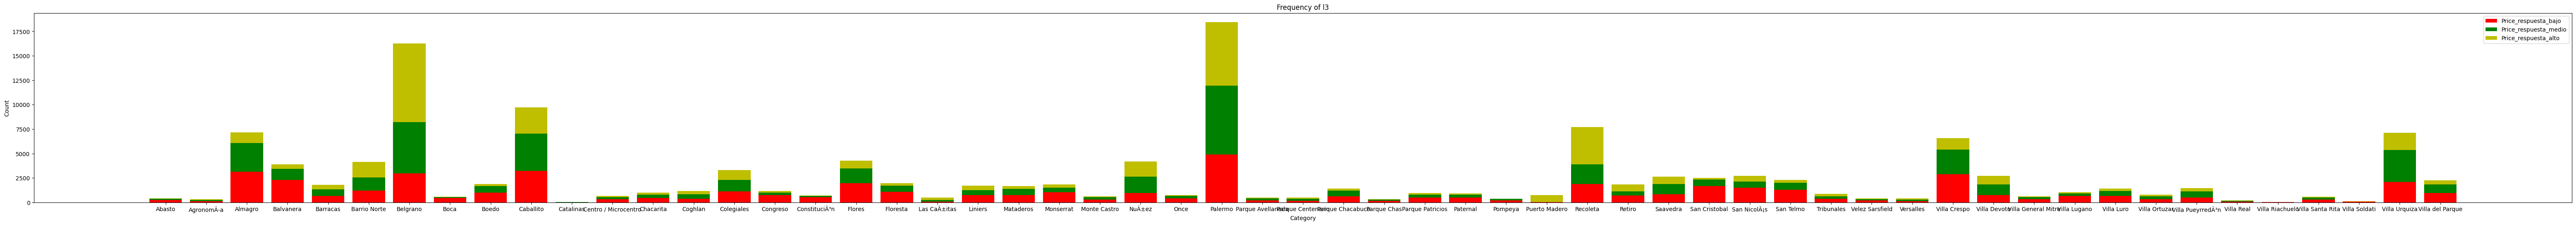

In [22]:
# Agrupar los datos por la columna "l3" y la columna "price_respuesta"
grouped_data = datos.groupby(["l3", "price_respuesta"])

# Contar el número de ocurrencias para cada combinación de categoría y valor de target
count_data = grouped_data.size().reset_index(name="count")

# Trazar la gráfica con barras adicionales para cada categoría basadas en la variable target
fig, ax = plt.subplots()
fig.set_size_inches(80, 6)
ax.bar(count_data[count_data["price_respuesta"]=="bajo"]["l3"], count_data[count_data["price_respuesta"]=="bajo"]["count"], color="r", label="Price_respuesta_bajo")
ax.bar(count_data[count_data["price_respuesta"]=="medio"]["l3"], count_data[count_data["price_respuesta"]=="medio"]["count"], bottom=count_data[count_data["price_respuesta"]=="bajo"]["count"], color="g", label="Price_respuesta_medio")
ax.bar(count_data[count_data["price_respuesta"]=="alto"]["l3"], count_data[count_data["price_respuesta"]=="alto"]["count"],  bottom=count_data[count_data["price_respuesta"].isin(["bajo","medio"])].groupby("l3").sum()["count"], color="y", label="Price_respuesta_alto")
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Frequency of l3')
ax.legend()
# Agregar información adicional al gráfico al mover el cursor sobre él
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]}"))

plt.show()

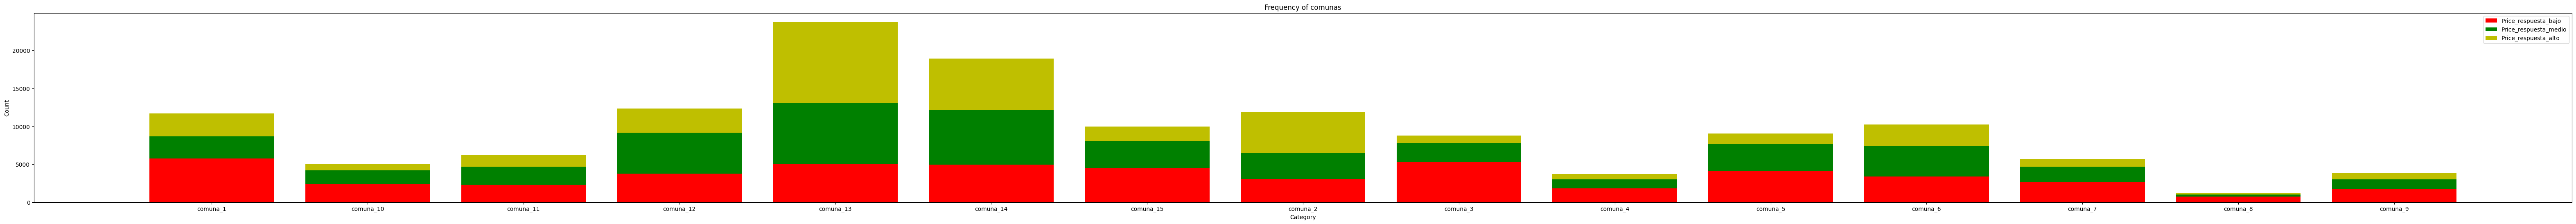

In [23]:
# Agrupar los datos por la columna "comunas" y la columna "price_respuesta"
grouped_data = datos.groupby(["comunas", "price_respuesta"])

# Contar el número de ocurrencias para cada combinación de categoría y valor de target
count_data = grouped_data.size().reset_index(name="count")

# Trazar la gráfica con barras adicionales para cada categoría basadas en la variable target
fig, ax = plt.subplots()
fig.set_size_inches(80, 6)
ax.bar(count_data[count_data["price_respuesta"]=="bajo"]["comunas"], count_data[count_data["price_respuesta"]=="bajo"]["count"], color="r", label="Price_respuesta_bajo")
ax.bar(count_data[count_data["price_respuesta"]=="medio"]["comunas"], count_data[count_data["price_respuesta"]=="medio"]["count"], bottom=count_data[count_data["price_respuesta"]=="bajo"]["count"], color="g", label="Price_respuesta_medio")
ax.bar(count_data[count_data["price_respuesta"]=="alto"]["comunas"], count_data[count_data["price_respuesta"]=="alto"]["count"],  bottom=count_data[count_data["price_respuesta"].isin(["bajo","medio"])].groupby("comunas").sum()["count"], color="y", label="Price_respuesta_alto")
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Frequency of comunas')
ax.legend()
# Agregar información adicional al gráfico al mover el cursor sobre él
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Count: {sel.target[1]}"))

plt.show()

Las categorias de precios estan medianamente bien distribuidas entre las categorais de las variables "terraza_patio_balcon", "property_type", "l3" y "comunas". (Sin mayores colcusiones respecto de los últimos 4 graficos..)

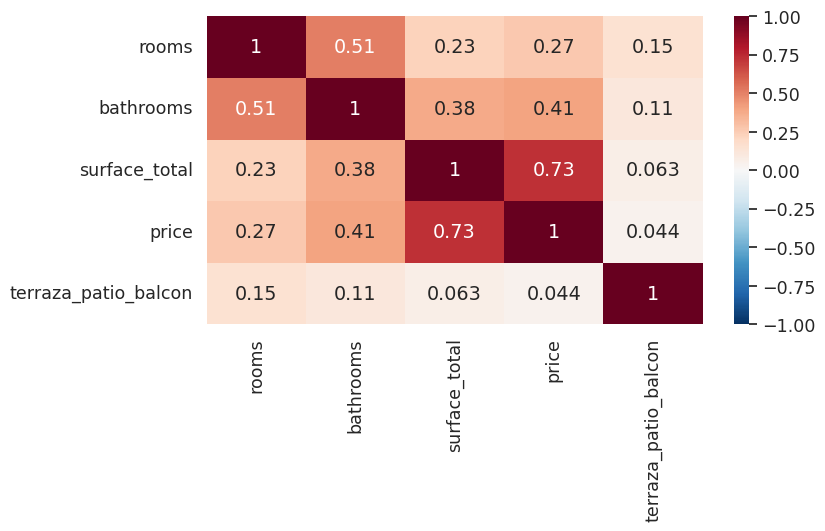

In [24]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    datos.corr(),
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1);

In [ ]:
# sns.pairplot(
#     data=datos,
#     aspect=.85,
#     hue='price_respuesta')

## Dropeo de columna


In [25]:
datos.drop_duplicates(inplace=True)

In [26]:
#Dado que el barrio nos da una información mas especifica que las que nos provee la comuna, se decide no utilizar esta última columna
datos.drop("comunas", inplace = True, axis = 1)

In [27]:
#Separo nuevamente la info
datos_categorial = datos.copy().drop(['price'], axis=1)
datos_regresion = datos.copy().drop(['price_respuesta'], axis=1)

## Transformación de datos


In [28]:
## LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [29]:
datos_categorial['price_respuesta'] = datos_categorial['price_respuesta'].astype("str")
datos_categorial.loc[datos_categorial['price_respuesta']=='bajo', 'price_respuesta'] = 0
datos_categorial.loc[datos_categorial['price_respuesta']=='medio', 'price_respuesta'] = 1
datos_categorial.loc[datos_categorial['price_respuesta']=='alto', 'price_respuesta'] = 2
datos_categorial['price_respuesta'] = datos_categorial['price_respuesta'].astype(np.int64)

In [30]:
labelencoder = LabelEncoder()
datos_categorial['property_type'] = labelencoder.fit_transform(datos_categorial['property_type'])
datos_categorial['terraza_patio_balcon'] = labelencoder.fit_transform(datos_categorial['terraza_patio_balcon'])
datos_categorial['l3'] = labelencoder.fit_transform(datos_categorial['l3'])
datos_categorial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100381 entries, 2 to 183802
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rooms                 100381 non-null  float64
 1   bathrooms             100381 non-null  float64
 2   surface_total         100381 non-null  float64
 3   property_type         100381 non-null  int64  
 4   terraza_patio_balcon  100381 non-null  int64  
 5   l3                    100381 non-null  int64  
 6   price_respuesta       100381 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 6.1 MB


In [31]:
labelencoder = LabelEncoder()

datos_regresion['property_type'] = labelencoder.fit_transform(datos_regresion['property_type'])
datos_regresion['terraza_patio_balcon'] = labelencoder.fit_transform(datos_regresion['terraza_patio_balcon'])
datos_regresion['l3'] = labelencoder.fit_transform(datos_regresion['l3'])
datos_regresion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100381 entries, 2 to 183802
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   rooms                 100381 non-null  float64
 1   bathrooms             100381 non-null  float64
 2   surface_total         100381 non-null  float64
 3   price                 100381 non-null  float64
 4   property_type         100381 non-null  int64  
 5   terraza_patio_balcon  100381 non-null  int64  
 6   l3                    100381 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 6.1 MB


## Regresión

Se van a utilizar los modelos:


*   Arbol de decisión
*   Regresión Lineal
*   Random Forest Regressor



In [32]:
features_reg= datos_regresion.columns.drop('price')
target_reg = ['price']
# print(features_reg_)

In [33]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(datos_regresion[features_reg].values, datos_regresion[target_reg].values, test_size=0.2, random_state=42)

#### DecisionTreeRegressor


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer
import numpy as np

In [35]:
params_grid = {'max_depth': range(1, 20, 4),
               'min_samples_leaf':range(1, 50, 5),
               'criterion': ["squared_error", "absolute_error"]}

kfoldcv = KFold(n_splits=5)
base_tree = DecisionTreeRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
DTR_randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=50,
                                  error_score='raise', n_jobs= -1)
DTR_randomcv.fit(x_train_reg,y_train_reg);

In [36]:
print('Mejores hiperparámetros:', DTR_randomcv.best_params_)
print('RMSE del modelo:', DTR_randomcv.best_score_)

Mejores hiperparámetros: {'min_samples_leaf': 26, 'max_depth': 1, 'criterion': 'absolute_error'}
RMSE del modelo: 250247.8680517376


In [37]:
print(base_tree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [38]:
# Predicciones en el conjunto de test para DTR
DTR_best_model = DTR_randomcv.best_estimator_
x_test_df = pd.DataFrame(x_test_reg, columns= features_reg)
y_pred_reg = DTR_best_model.predict(x_test_df)

# Cálculo del error cuadrático medio en el conjunto de test para DTR
rmse_DTR = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

print("Raiz Error cuadrático medio (RMSE):", rmse_DTR)

Raiz Error cuadrático medio (RMSE): 239933.99224149104


In [39]:
pd.DataFrame(zip(features_reg,DTR_best_model.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
2,surface_total,1.0
0,rooms,0.0
1,bathrooms,0.0
3,property_type,0.0
4,terraza_patio_balcon,0.0
5,l3,0.0


### **Regresión lineal**

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
print("Tamaño del conjunto de entrenamiento:", x_train_reg.shape)
print("Tamaño del conjunto de test:", x_test_reg.shape)
print("Tamaño del conjunto de prueba:", x_test_reg.shape)

Tamaño del conjunto de entrenamiento: (80304, 6)
Tamaño del conjunto de test: (20077, 6)
Tamaño del conjunto de prueba: (20077, 6)


In [42]:
#Probamos Ridge y Lasso eligiendo alpha con CV
alphas = np.logspace(-20, 1, 20)

reg_ridgeCV =RidgeCV(alphas=alphas, cv=5)
reg_lassoCV = LassoCV(alphas=alphas, cv=5)

reg_ridgeCV.fit(x_train_reg, y_train_reg);
reg_lassoCV.fit(x_train_reg, y_train_reg);

#### Ridge

In [43]:
# Predicciones en el conjunto de train para Ridge
y_train_pred_ridgeCV = reg_ridgeCV.predict(x_train_reg)

# Cálculo del error cuadrático medio en el conjunto de train para Ridge
rmse_train_ridgeCV = mean_squared_error(y_train_reg, y_train_pred_ridgeCV, squared=False)

print("Mejor alfa encontrado:", reg_ridgeCV.alpha_)
print("Error cuadrático medio (RidgeCV):", rmse_train_ridgeCV)

Mejor alfa encontrado: 1e-20
Error cuadrático medio (RidgeCV): 176346.49639726407


In [44]:
# Predicciones en el conjunto de test para Ridge
y_val_pred_ridgeCV = reg_ridgeCV.predict(x_test_reg)

# Cálculo del error cuadrático medio en el conjunto de test para Ridge
rmse_ridgeCV = mean_squared_error(y_test_reg, y_val_pred_ridgeCV, squared=False)

print("Error cuadrático medio (RidgeCV):", rmse_ridgeCV)

Error cuadrático medio (RidgeCV): 184184.55552109002


#### Lasso

In [45]:
# Predicciones en el conjunto de train para Lasso
y_train_pred_lassoCV = reg_lassoCV.predict(x_train_reg)

# Cálculo del error cuadrático medio en el conjunto de train
rmse_train_lassoCV = mean_squared_error(y_train_reg, y_train_pred_lassoCV, squared=False)

print("Mejor alfa encontrado:", reg_lassoCV.alpha_)
print("Error cuadrático medio (LassoCV):", rmse_train_lassoCV)
print("Betas", reg_lassoCV.coef_)
print("Beta 0",reg_lassoCV.intercept_)

Mejor alfa encontrado: 8.858667904100832e-11
Error cuadrático medio (LassoCV): 176346.49639726407
Betas [11511.4198219  44554.60493783  1351.48782655 -5936.5242827
 -9840.83187946  -240.99412191]
Beta 0 4014.800128627161


In [46]:
# Predicciones en el conjunto de test para Lasso
y_val_pred_lassoCV = reg_lassoCV.predict(x_test_reg)

# Cálculo del error cuadrático medio en el conjunto de test
rmse_lassoCV = mean_squared_error(y_test_reg, y_val_pred_lassoCV, squared=False)

print("Error cuadrático medio (LassoCV):", rmse_lassoCV)

Error cuadrático medio (LassoCV): 184184.55552109008


### Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
params_grid = {'n_estimators': range(100,200, 20),
               'max_depth': range(1, 20, 2),
               'min_samples_leaf':range(1, 50, 5)}


kfoldcv = KFold(n_splits=5)
base_rf = RandomForestRegressor(random_state = 42)
scorer_fn = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))
RFR_randomcv = RandomizedSearchCV(estimator=base_rf, param_distributions=params_grid,
                              scoring=scorer_fn, cv=kfoldcv, n_iter= 50, n_jobs= -1)
RFR_randomcv .fit(x_train_reg,y_train_reg.ravel());

In [49]:
print('Mejores hiperparámetros:', RFR_randomcv.best_params_)
print('RMSE del modelo:', RFR_randomcv.best_score_)

Mejores hiperparámetros: {'n_estimators': 180, 'min_samples_leaf': 46, 'max_depth': 1}
RMSE del modelo: 223883.76772021


In [50]:
# Predicciones en el conjunto de test para DTR
RFR_best_model = RFR_randomcv.best_estimator_
x_val_df = pd.DataFrame(x_test_reg, columns= features_reg)
y_pred_reg = RFR_best_model.predict(x_val_df)

# Cálculo del error cuadrático medio en el conjunto de test para DTR
rmse_RFR = mean_squared_error(y_test_reg, y_pred_reg, squared=False)

print("Raiz Error cuadrático medio:", rmse_RFR)

Raiz Error cuadrático medio: 219220.40300746288


In [51]:
pd.DataFrame(zip(features_reg,RFR_randomcv.best_estimator_.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
2,surface_total,1.0
0,rooms,0.0
1,bathrooms,0.0
3,property_type,0.0
4,terraza_patio_balcon,0.0
5,l3,0.0


## Clasificación

Se van a utilizar los modelos:


*   Arbol de decisión
*   Random Forest Classifier



In [52]:
features_cla = [
 'property_type',
 'rooms',
 'surface_total',
 'terraza_patio_balcon',
 'l3',
 'bathrooms']

target_cla = ['price_respuesta']

In [53]:
x_train_cla, x_test_cla, y_train_cla, y_test_cla = train_test_split(datos_categorial[features_cla].values, datos_categorial[target_cla].values, test_size=0.2, random_state=42)

### DecisionTreeClassifier


In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
params_grid = {'max_depth': range(1, 20, 2),
               'min_samples_leaf':range(1, 50, 5),
               'criterion': ["gini", "entropy"]}


kfoldcv = StratifiedKFold(n_splits=5)
base_tree = DecisionTreeClassifier(random_state = 42)
scorer_fn = make_scorer(accuracy_score)
DTC_randomcv = RandomizedSearchCV(estimator=base_tree,param_distributions = params_grid,scoring=scorer_fn,cv=kfoldcv,n_iter=50)
DTC_randomcv.fit(x_train_cla,y_train_cla);

In [56]:
print('Mejores hiperparámetros:', DTC_randomcv.best_params_)
print('Precisión del modelo:', DTC_randomcv.best_score_)

Mejores hiperparámetros: {'min_samples_leaf': 31, 'max_depth': 15, 'criterion': 'gini'}
Precisión del modelo: 0.7440102890730336


In [57]:
from sklearn.metrics import confusion_matrix, classification_report

DTC_best_model = DTC_randomcv.best_estimator_
x_test_df = pd.DataFrame(x_test_cla, columns= features_cla)
y_pred = DTC_best_model.predict(x_test_df)

print('Precisión del modelo:', accuracy_score(y_test_cla, y_pred))
print()
print(classification_report(y_test_cla,y_pred))

Precisión del modelo: 0.7461772177118096

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7480
           1       0.65      0.65      0.65      6905
           2       0.81      0.79      0.80      5692

    accuracy                           0.75     20077
   macro avg       0.75      0.75      0.75     20077
weighted avg       0.75      0.75      0.75     20077



Text(43.25, 0.5, 'True')

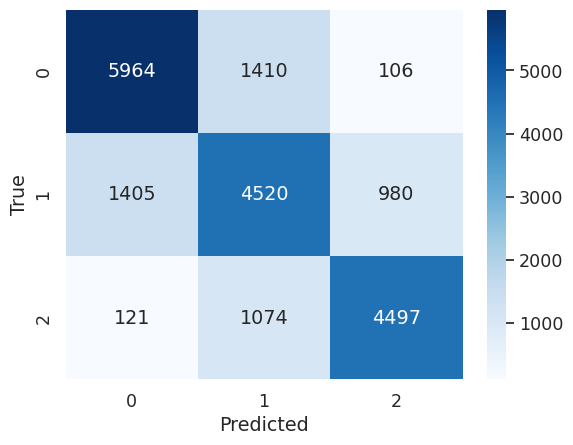

In [58]:
cm = confusion_matrix(y_test_cla,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

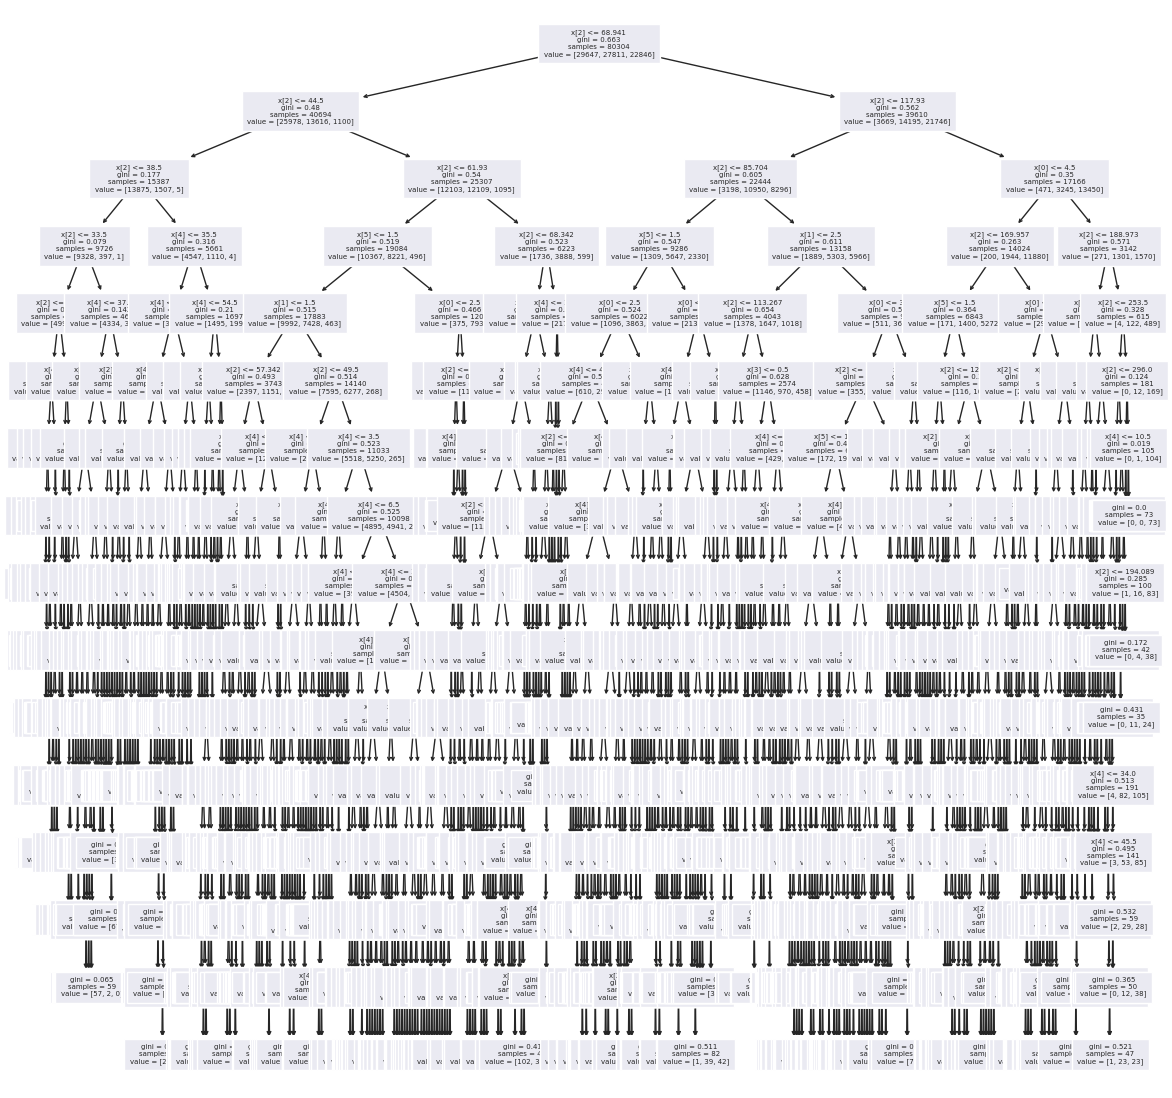

In [59]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(DTC_best_model, fontsize=5)
plt.show()

In [60]:
pd.DataFrame(zip(features_cla,DTC_best_model.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
2,surface_total,0.744289
4,l3,0.153622
0,property_type,0.043152
1,rooms,0.030069
5,bathrooms,0.022339
3,terraza_patio_balcon,0.006528


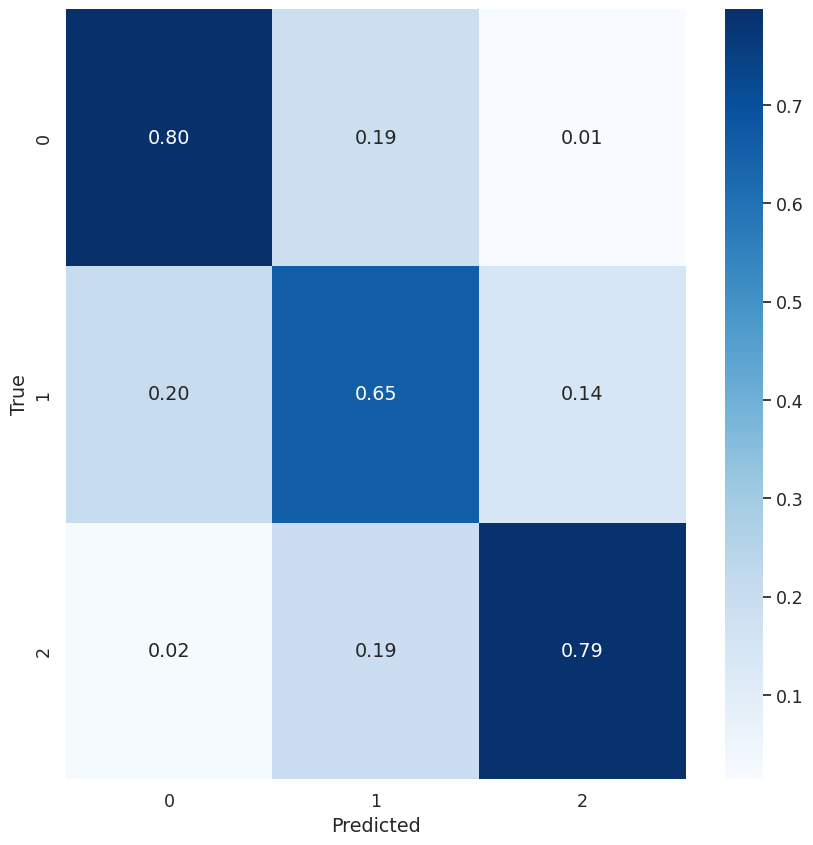

In [61]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["0","1","2"], yticklabels=["0","1","2"], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show(block=False)

### Random Forest Clasifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
params_grid = {'n_estimators': range(10,200, 40),
               'max_depth': range(1, 20, 2),
               'min_samples_leaf':range(1, 50, 5)}

kfoldcv = StratifiedKFold(n_splits=5)
base_rf = RandomForestClassifier(random_state = 42)
scorer_fn = make_scorer(accuracy_score)
RFC_randomcv = RandomizedSearchCV(estimator=base_rf, param_distributions=params_grid,
                              scoring=scorer_fn, cv=kfoldcv,n_iter=50, n_jobs= -1)
RFC_randomcv.fit(x_train_cla, y_train_cla.ravel());

In [64]:
print('Mejores hiperparámetros:', RFC_randomcv.best_params_)
print('Precisión del modelo:', RFC_randomcv.best_score_)

Mejores hiperparámetros: {'n_estimators': 90, 'min_samples_leaf': 6, 'max_depth': 19}
Precisión del modelo: 0.751867890343036


In [65]:
from sklearn.metrics import confusion_matrix, classification_report

RFC_est_model = RFC_randomcv.best_estimator_
x_test_df = pd.DataFrame(x_test_cla, columns= features_cla)
y_pred = RFC_est_model.predict(x_test_df)

print('Precisión del modelo:', accuracy_score(y_test_cla, y_pred))
print()
print(classification_report(y_test_cla,y_pred))

Precisión del modelo: 0.7520047815908751

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      7480
           1       0.65      0.66      0.65      6905
           2       0.81      0.81      0.81      5692

    accuracy                           0.75     20077
   macro avg       0.75      0.75      0.75     20077
weighted avg       0.75      0.75      0.75     20077



Text(43.25, 0.5, 'True')

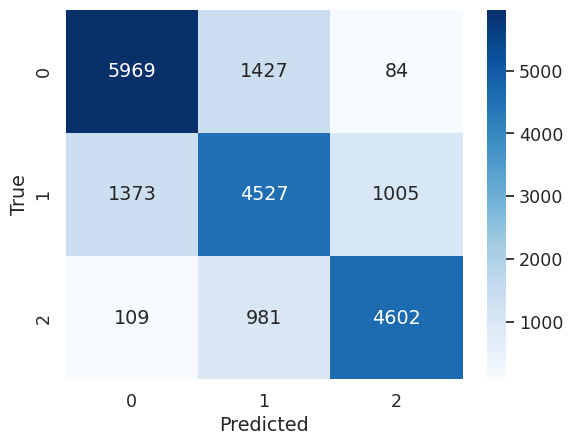

In [66]:
cm = confusion_matrix(y_test_cla,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [67]:
pd.DataFrame(zip(features_cla,RFC_est_model.feature_importances_), columns=["column", "feature_importance"]).sort_values(by="feature_importance", ascending=False)

,column,feature_importance
2,surface_total,0.499533
4,l3,0.155716
1,rooms,0.147708
5,bathrooms,0.140690
0,property_type,0.044622
3,terraza_patio_balcon,0.011731


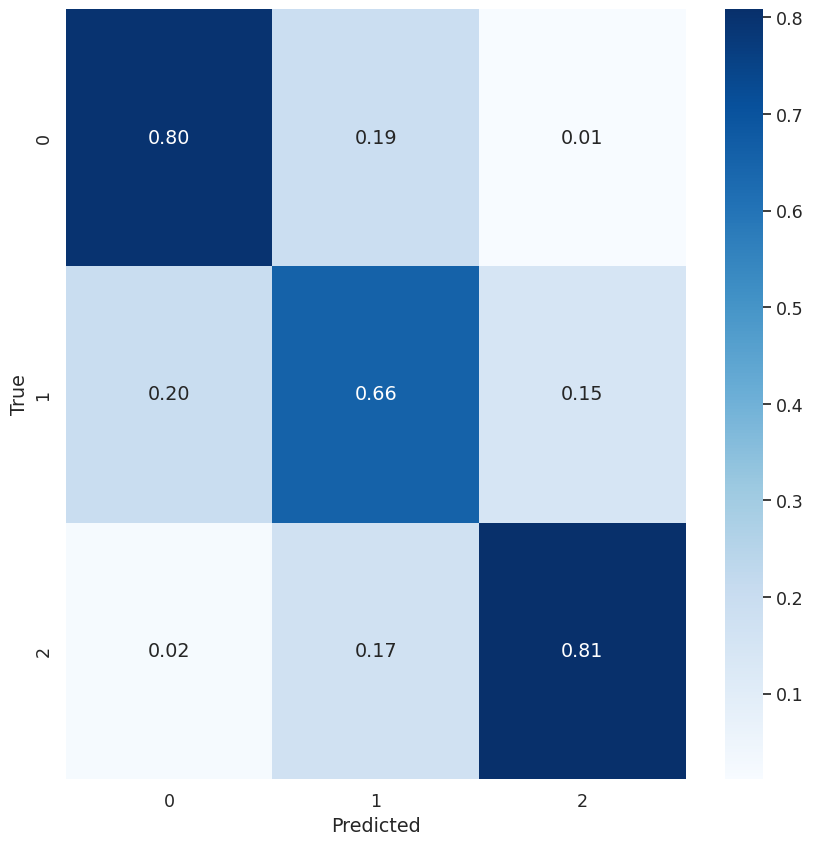

In [68]:
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=["0","1","2"], yticklabels=["0","1","2"], cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show(block=False)